In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
import math
from keras.models import Sequential, load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("origin_data.csv", usecols=[1])
dataset = df.values

In [3]:
df

Office_Marla
0            10.50
1             8.25
2             9.00
3             9.00
4             9.25
5            10.25
6             9.00
7            12.00
8            10.50
9             9.50
10            9.25
11           10.25
12           10.75
13           13.00
14           12.75
15           12.25
16           14.25
17           13.75
18           11.75
19           11.75
20           12.25
21           13.75
22           12.25
23           11.50
24           11.50
25           11.25
26           13.25
27           12.75
28           12.50
29           12.25
...            ...
2058         13.25
2059         12.25
2060         12.25
2061         12.75
2062         10.50
2063         12.00
2064         12.25
2065         10.25
2066          9.50
2067          9.25
2068          9.25
2069          8.50
2070          9.25
2071          8.50
2072          9.25
2073          9.50
2074          8.75
2075          9.75
2076          9.25
2077         10.00
2078          9.75
2079         13.25
2080         13.75
2081         12.50
2082         11.75
2083         12.25
2084         12.50
2085         10.75
2086         10.25
2087         10.50

[2088 rows x 1 columns]

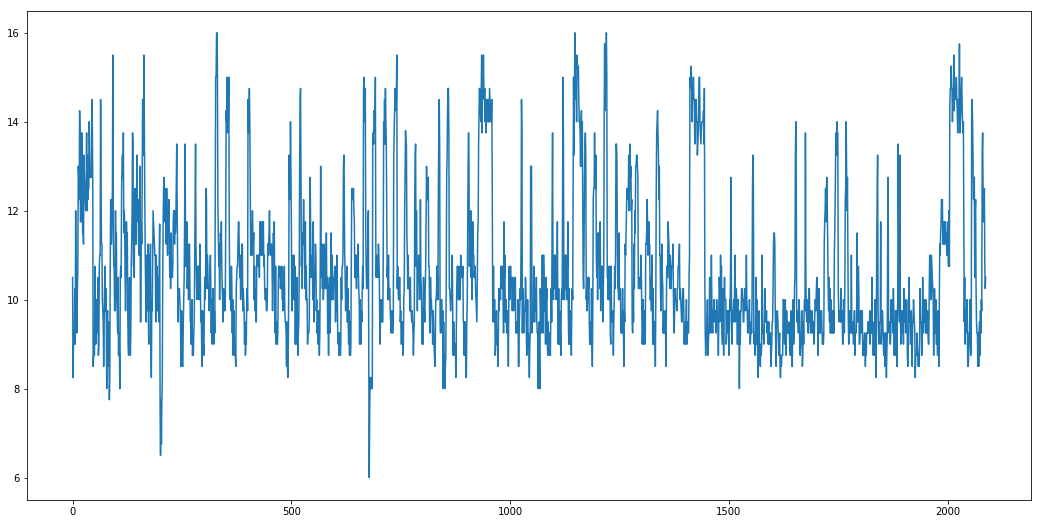

In [4]:
plt.figure(figsize=(18, 9))
plt.plot(dataset)
plt.show()

In [5]:
#归一化 在下一步会讲解
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.65)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]

In [6]:
def create_dataset(dataset, look_back):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):       #  减1 ？
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX),np.array(dataY)

In [7]:
# 用前10个预测下一个
look_back = 3
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)

In [8]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

In [9]:
# 创建LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
1354/1354 - 2s - loss: 0.0266
Epoch 2/10
1354/1354 - 2s - loss: 0.0146
Epoch 3/10
1354/1354 - 3s - loss: 0.0138
Epoch 4/10
1354/1354 - 3s - loss: 0.0131
Epoch 5/10
1354/1354 - 2s - loss: 0.0121
Epoch 6/10
1354/1354 - 2s - loss: 0.0113
Epoch 7/10
1354/1354 - 2s - loss: 0.0109
Epoch 8/10
1354/1354 - 2s - loss: 0.0105
Epoch 9/10
1354/1354 - 2s - loss: 0.0104
Epoch 10/10
1354/1354 - 2s - loss: 0.0105


In [10]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [11]:
#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [12]:
predict = np.append(trainPredict, testPredict)
y = np.append(trainY, testY)

In [14]:
# 求均方误差
trainScore = math.sqrt(mean_squared_error(trainY[:, 0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:, 0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.01 RMSE
Test Score: 0.89 RMSE


In [13]:
# 求均方误差
trainScore = math.sqrt(mean_squared_error(trainY.flatten(), trainPredict.flatten()))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY.flatten(), testPredict.flatten()))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.01 RMSE
Test Score: 0.89 RMSE


## 所有数据 

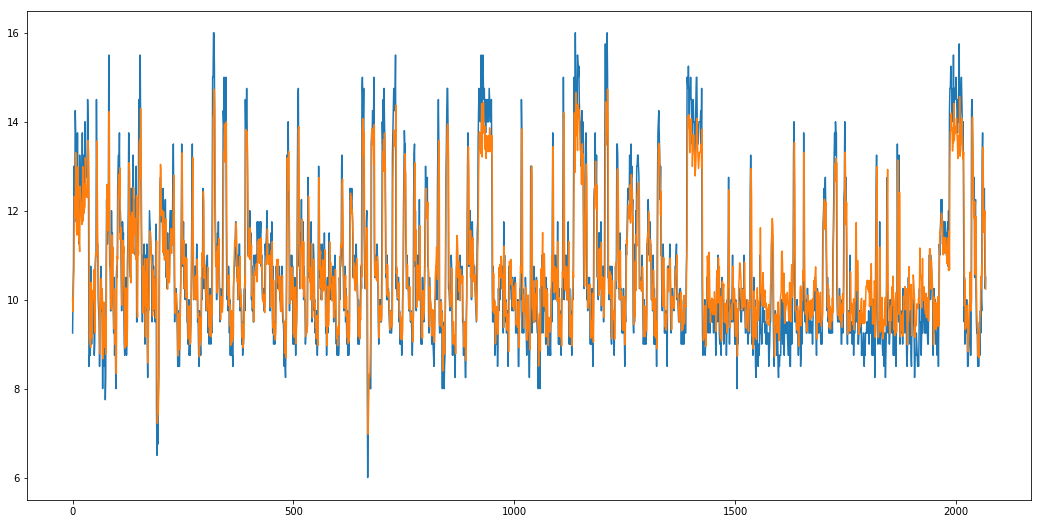

In [14]:
plt.figure(figsize=(18, 9))
plt.plot(y)
plt.plot(predict)
plt.show()

## 训练集 

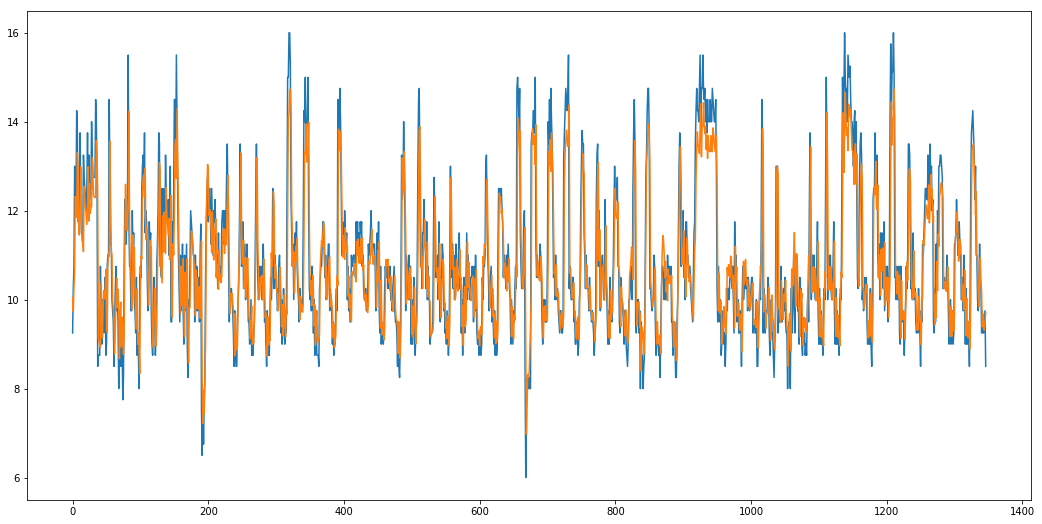

In [15]:
plt.figure(figsize=(18, 9))
plt.plot(trainY)
plt.plot(trainPredict)
plt.show()

## 测试集

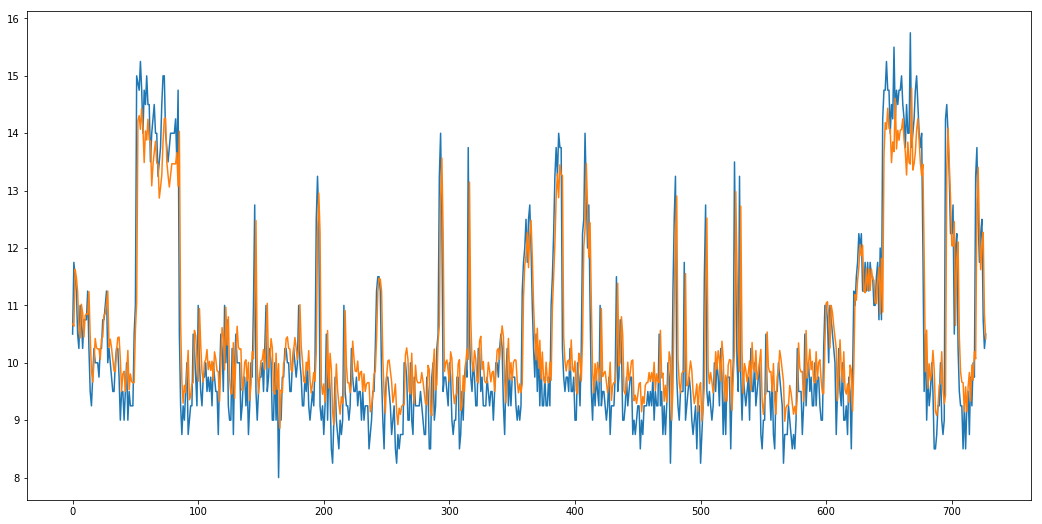

In [15]:
plt.figure(figsize=(18, 9))
plt.plot(testY)
plt.plot(testPredict)
plt.show()

## 前200条数据 

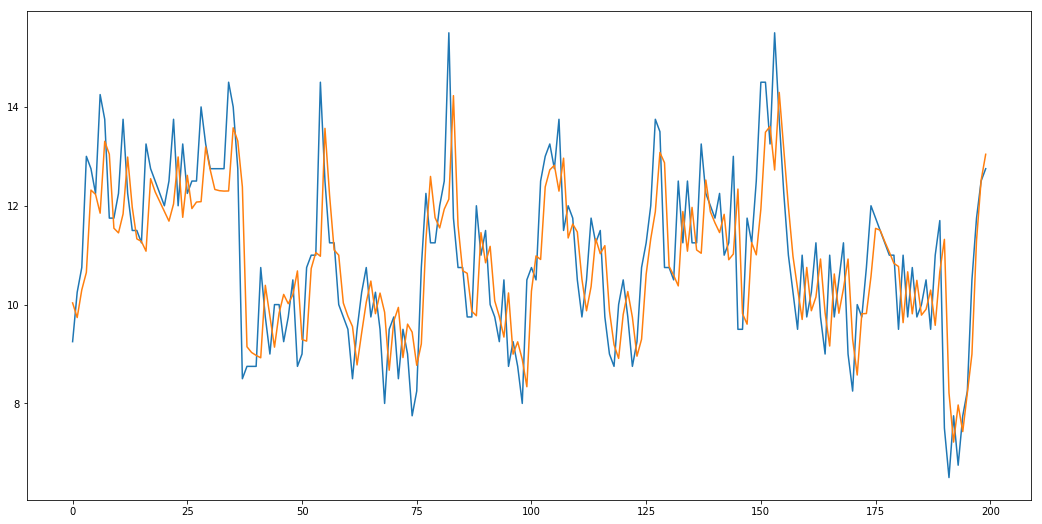

In [17]:
plt.figure(figsize=(18, 9))
plt.plot(y[:200])
plt.plot(predict[:200])
plt.show()

## 后200条数据 

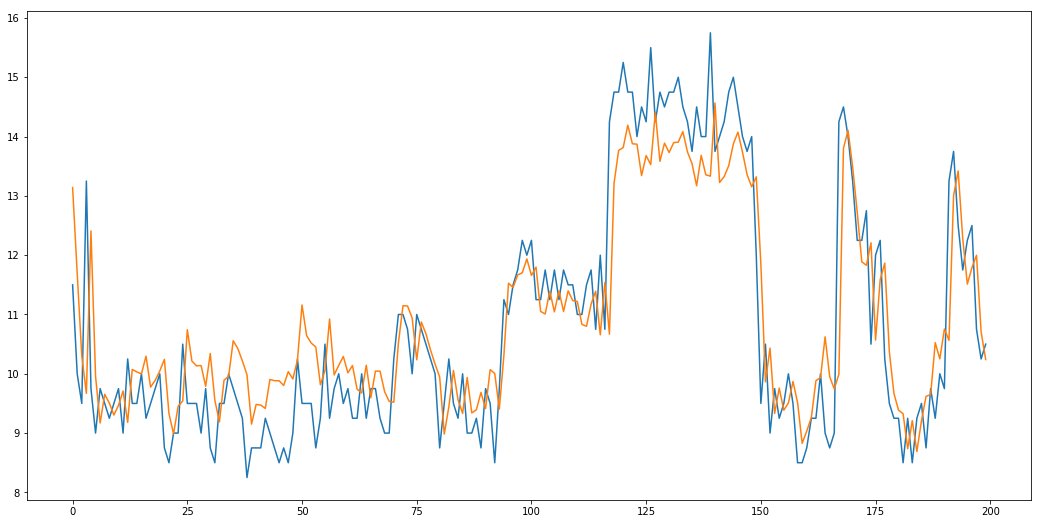

In [18]:
plt.figure(figsize=(18, 9))
plt.plot(y[-200:])
plt.plot(predict[-200:])
plt.show()

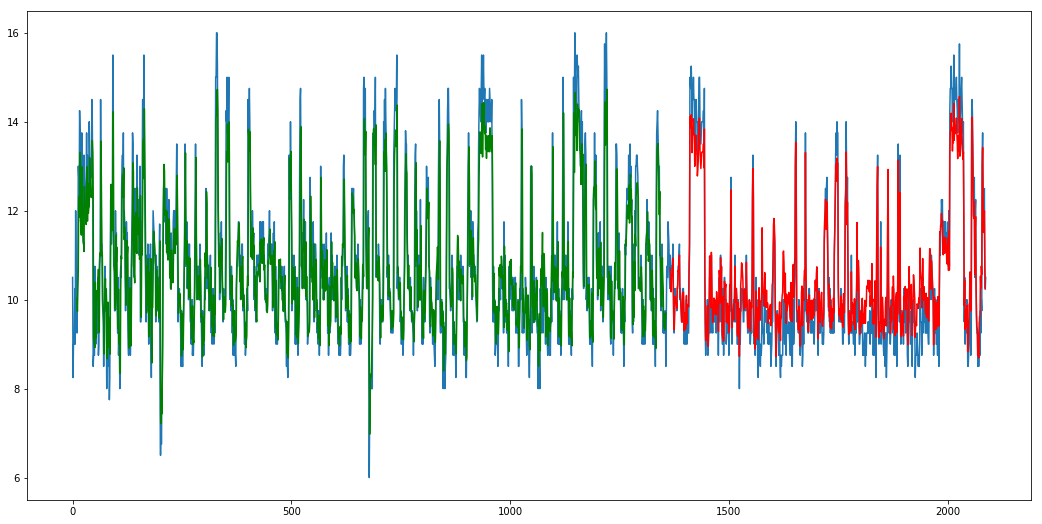

In [21]:
plt.figure(figsize=(18, 9))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)-1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot,'g')
plt.plot(testPredictPlot,'r')
plt.show()